# Pima Indian Diabetes

This is a very common dataset used in Machine Learning, and since this is my first time working on a project, I have decided to use this dataset to try out. The data is available in the link below.

The dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Objective
1) To attempt to see if it is possible to gleam any further information from the data to determine correlation between parameters and diabetes.
<br>2) To attempt to get the best accuracy score using various supervised learning machine learning algorithms.

## To do list
Below would be my train of thought of the things need to be done in order to process the dataset and to get the algorithm to predict. I will be using it as a task list to check off items done as well.

- understand the database and the parameters [done]
- any missing/blank values in the dataset? [done]
- check data information & distribution of data [done]
- account for any outliers? [done]
- any correlation so that can drop off data? [done]
- Hypothesis Testing if any? [done]
- train / validation / test dataset split? [done]
- Feature Scaling [done]
- ratio of targets? is it sufficient? Does it require upsampling/downsampling? [done]
- PCA decomposition required? [done]
- various Algorithms to be used [done]
- need to build pipeline? [done]
- predict accuracy and Confusion metrics [done]
- ROC & AUC [done]
- conclusion [done]

In [1]:
# Import libraries which will be used.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

Using TensorFlow backend.


In [2]:
# Load the data and check the data structure

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Understanding parameters

Since I am not from medical background, it would be good for me to get an idea of what the above parameters mean and indicate, so that I am able to get a sense of what each parameter does and how does it fit into determining diabetes.

Pregnancies:  No. of times pregnant

Glucose:   Plasma glucose concentration a 2 hours in an oral glucose tolerance test. I am unable to find out which does it indicate (in the form of mg/dL or mmol/L), but looking at the data below, I am going to assume it is referring to mg/dL.
<br> A reading of more than 200 mg/dL (11.1 mmol/L) after two hours indicates diabetes.

BloodPressure:   Diastolic blood pressure (mm Hg). It is the bottom number in blood pressure tests, and is the pressure in the arteries when the heart rests between beats. The blood pressure exerts within the arteries in between heartbeats, which is when the heart is not actively ejecting blood into the arteries. After the heart is finished contracting, the cardiac ventricles relax momentarily so that they can be refilled with blood, in preparation for the next contraction.
<br>A normal diastolic blood pressure is < 80 mmHG.

SkinThickness:   Triceps skin fold thickness (mm). Studies have been conducted, with conclusions that there are associations between people with thicker skin and diabetes.

Insulin:   2-Hour serum insulin (mu U/ml). Insulin is a hormone made by the pancreas that allows your body to use sugar (glucose) from carbohydrates in the food that you eat for energy or to store glucose for future use. A high insulin level is associated with diabetes.

BMI:   Body mass index (weight in kg/(height in m)^2)
       <br>Range of BMI:
       <br>BMI < 18.5 - underweight
       <br>18.5 < BMI < 24.9 - ideal weight
       <br>25 < BMI < 29.9 - overweight
       <br>29.9 < BMI - obese

DiabetesPedigreeFunction:   It is a synthesis of the diabetes mellitus history in relatives and the genetic relationship of those relatives to the subject. It utilizes information from a person’s family history to predict how diabetes will affect that individual. 
<br> Results show that a person with a higher pedigree function tested positive and those who had a lower pedigree function tested negative.

Age:   Age of the patient in years
Outcome:   The target column which we are interested in finding out. 1 - diabetic, 0 - non-diabetic

# Exploratory Data Analysis

### Check missing values

In [3]:
# Check if there are any missing values in the dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above, there doesn't seem to be any missing value points.

### Check database information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on the understanding of the parameters, it seems highly unlikely that glucose, bloodpressure, skinthickness, insulin and bmi levels are 0. 
<br>What i will do is to default the 0 values to the mean of each parameter. I will not amend the pregnancies column as it is possible that the woman in the dataset has never been pregnant.This should impact the distribution of the data, and reduce variance in it. 
<br>I will also not be normalizing the outliers (modifying the values to the mean or the 1st/3rd quartiles) as I think there is not sufficient data available, and they will represent the variability in the dataset.

In [6]:
# Create a copy of the original dataset and replace the 0 values of the impacted columns with the mean values

df_0 = df.copy()

cols_0 = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols_0:
    df_0[i].replace(0,df_0[i].mean(),inplace=True)

df_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [7]:
df_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now that the 0 values are accounted for, we can proceed with the rest of the Exploratory Data Analysis.

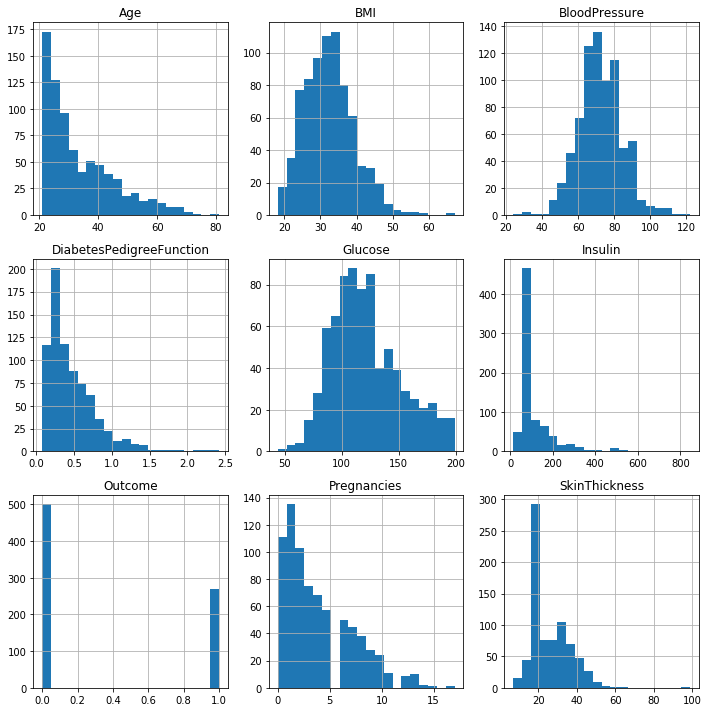

In [8]:
# Histogram plot of data

col = list(df_0.columns)
df_0[col].hist(stacked=True, bins=20, figsize=(10,10), layout=(3,3))
plt.tight_layout()

The above histogram plots give a high-level view of the bucket distribution of the dataset parameters.
<br> At first glance, most of them appear to be positively skewed, with Glucose and BloodPressure with the closest distribution to a normal distribution. Outcome is a bimodal distribution which is to be expected.
<br> There appear to have very few outliers for each of the parameters.

### Account for outliers?

As mentioned above, since I think that there is not sufficient data available (ie dataset < 1000, even with upsampling later on the number won't be sufficient), the numbers are actual data taken from sample patients and they will represent the variability in the dataset. 
<br> From the histogram plot above also, there doesn't seem to have that many outliers.
<br> From the dataset description, only Insulin is the only parameter which has a very huge outlier but I think it should be fine to leave it in the dataset as it is.

### Check Correlation of data

In [9]:
df_0.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


From the above correlation matrix, we can see that there doesn't appear to have any parameters which have very strong correlation to each other.
<br>The parameter with the highest positive correlation to each other is BMI and SkinThickness. This is further confirmed by the pairplot below. The rest do not have strong multi-collinearity to each other.
<br>Hence, I will not be dropping any parameters.

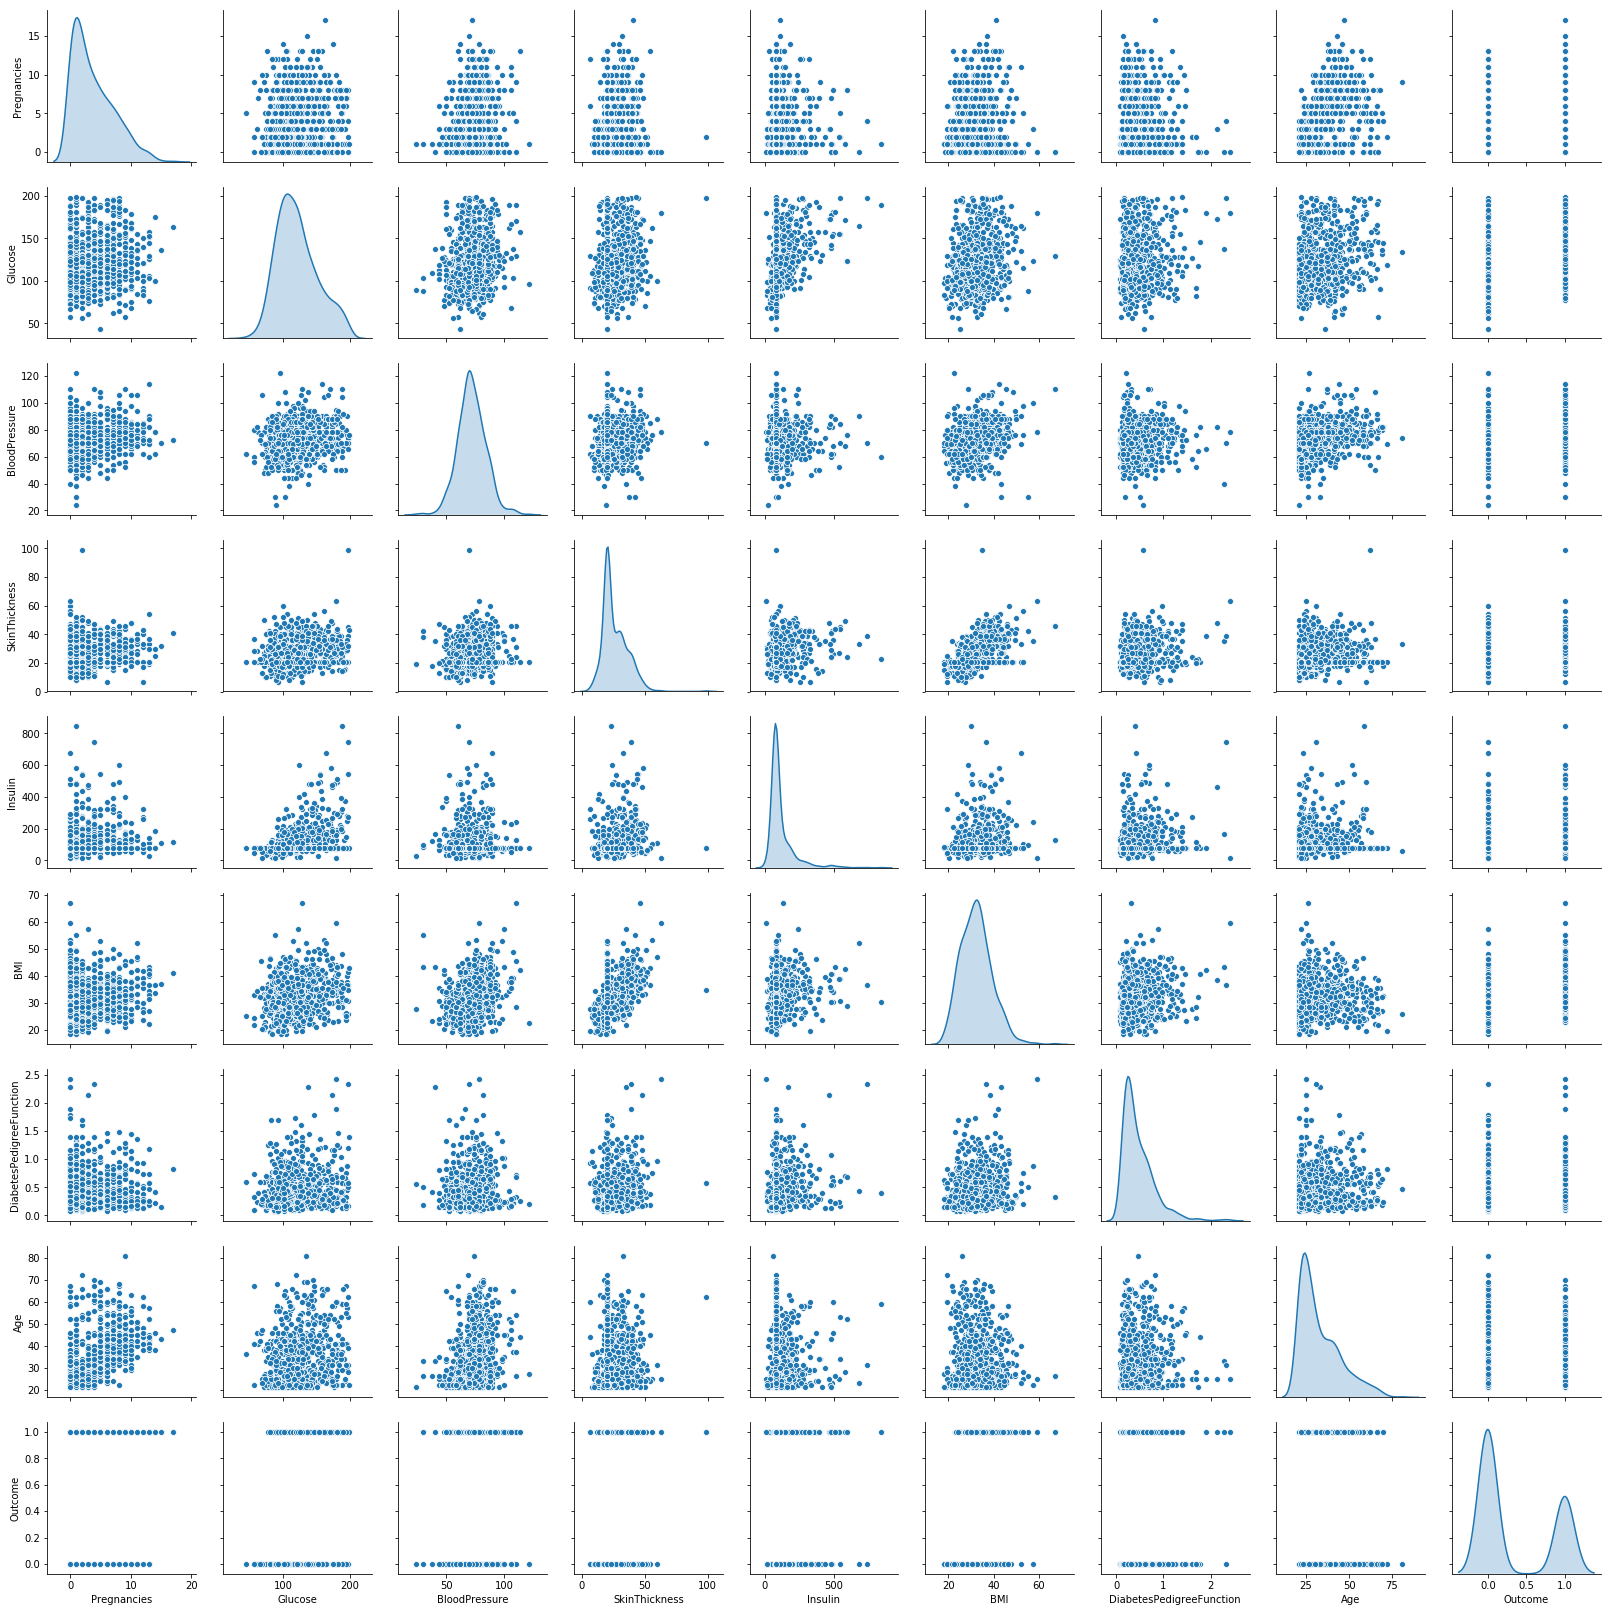

In [10]:
sns.pairplot(df_0,diag_kind='kde');

From the kde plots, we can see that this confirms my histogram plot distribution, that most of the parameters are positively skewed, with outcome having a bimodal distribution, which is to be expected.
<br> Glucose and BloodPressure are the only parameters which most resemble a normal distribution.

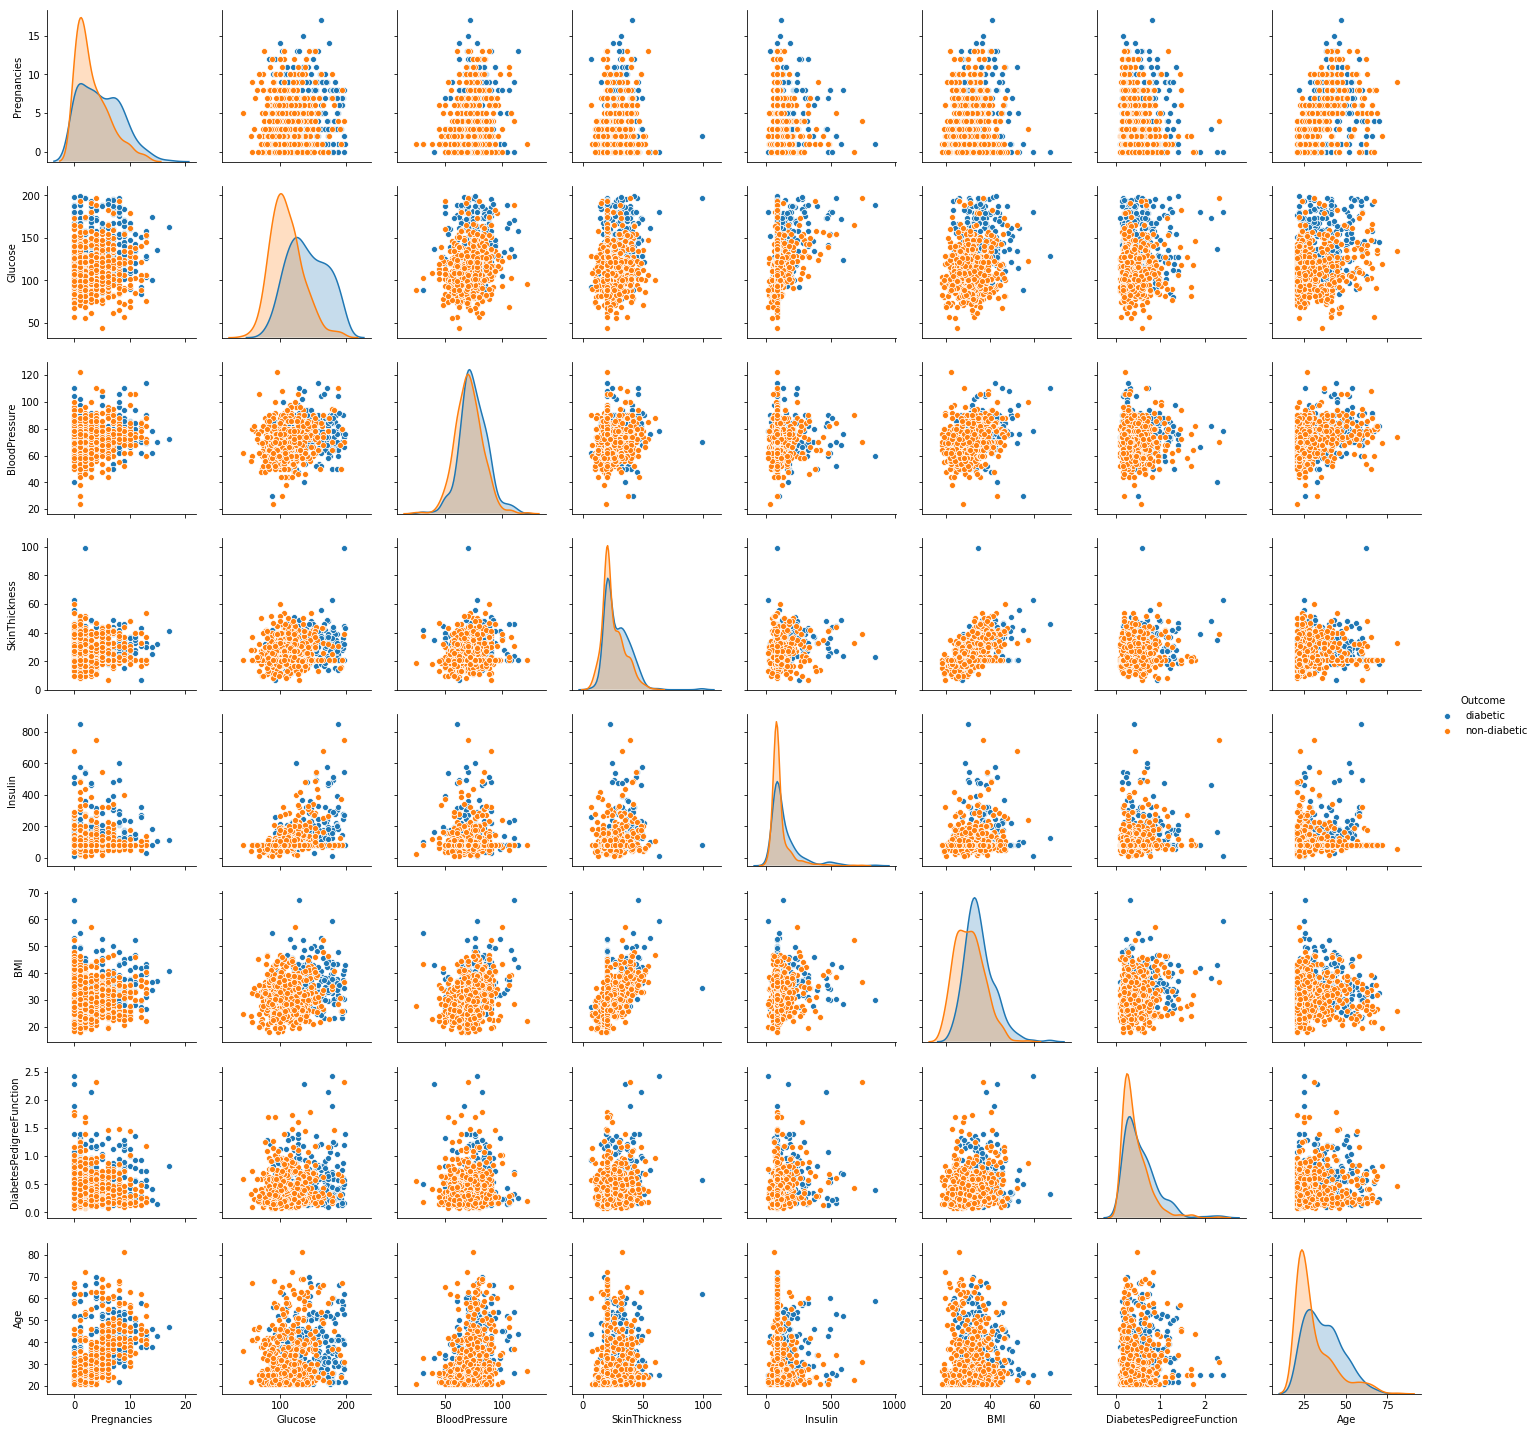

In [11]:
# Try to plot a pairplot to see which paramaters might have a stronger correlation with either outcomes of diabetic patient
# and non-diabetic patient

df_t = df_0.copy()

df_t['Outcome'].astype('category')
df_t['Outcome'].replace(0,"non-diabetic",inplace=True)
df_t['Outcome'].replace(1,"diabetic",inplace=True)

sns.pairplot(df_t,hue='Outcome',diag_kind='kde');

From the above, we can see the split in data which might potentially have correlation with the outcome. Unfortunately from the charts, we cannot really see a strong correlation between the parameters and the outcome, with the exception of Glucose, where the higher the glucose level, the greater the chance of a diabetic patient.
<br> This can be further confirmed by checking the correlation matrix done above, where they have a positive correlation of 0.492908.

### Hypothesis Testing

I will perform simple hypothesis testing.

First hypothesis test would be to try and confirm my suspicion if Glucose data has a normal distribution.
<br>Next hypothesis test would be that based on the above hypothesis test, I would test the correlation between Glucose and the target outcome.

In [12]:
#Assuming a 5% significance level for all the tests
alpha = 0.05

def hypothesis_result(p_value):
    p_value = round(p_value,4)
    if p_value < alpha:
        print ("As p-value is ",p_value,", which is lower than the significance level, we reject the null hypothesis.")
    else:
        print ("As p-value is ",p_value,", which is higher than the significance level, we do not reject the null hypothesis.")

**First Hypothesis Test**
<br> I will use the normaltest function in scipy.stats to perform the hypothesis testing.
<br>
<br> Null Hypothesis: The sample comes from a normal distribution.
<br> Alternative Hypothesis: The sample does not come from a normal distribution.

In [13]:
from scipy import stats

s2, p2 = stats.normaltest(df_0['Glucose'])

hypothesis_result(p2)

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.


From the above test result, we reject Glucose having a normal distribution.

**Second Hypothesis Test**
<br> Next, we will perform a Pearson correlation test using stats.pearsonr.
<br>
<br> Null Hypothesis: Both sets of data are uncorrelated.
<br> Alternative Hypothesis:  Both sets of data are somewhat correlated.

In [14]:
s1, p1 = stats.pearsonr(df_0['Glucose'],df_0['Outcome'])

hypothesis_result(p1)
print("The correlation coefficient between Glucose and the Target Variable is: " + str(round(s1,4)))

As p-value is  0.0 , which is lower than the significance level, we reject the null hypothesis.
The correlation coefficient between Glucose and the Target Variable is: 0.4929


From the above hypothesis testings, we can see that there is indeed some correlation between Glucose levels and diabetes.

### Splitting of Dataset (Training/Validation/Testing)

Here is a part where I was slightly confused between the splitting of dataset for validaton and testing. So I searched on google, and found the below to be my general ideas and impression for dividing into each of the data sets.
<br> **Training Dataset**: Dataset sample that is used to fit the model.
<br> **Validation Dataset**: Dataset sample that is used for hypertuning the parameters, and comparing the accuracy and error rates
of the model performance between using the training dataset and the validation dataset.
<br> **Testing Dataset**: Dataset sample that is used to test the model performance (predictive power).
<br>
<br> For this case, since I will use cross-validation on the training dataset directly for hypertuning, I will skip the division for validation dataset, and only split the dataset into Training and Testing, at a 70% / 30% ratio.

In [15]:
# Splitting the data set into training and test set

X = df_0.drop(['Outcome'],axis=1)
Y = df_0['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [16]:
# Print the distribution of labels between the training and testing dataset

print("Ratio of Diabetes to Non-Diabetic Labels in training dataset is: {}".format(round(y_train.value_counts()[0] \
                                                                                         /len(y_train),2)))
print("Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: {}".format(round(y_test.value_counts()[0] \
                                                                                         /len(y_test),2)))

Ratio of Diabetes to Non-Diabetic Labels in training dataset is: 0.66
Ratio of Diabetes to Non-Diabetic Labels in testing dataset is: 0.63


Seems to be fairly evenly distributed between the training and testing dataset. Okay to proceed to the next step.

### Feature Scaling

I will be using a StandardScaler to perform feature scaling. This will retain the mean and the standard deviation of the sample 
distribution of the data set, and reuse it to transform the X_train and X_test subsequently. I try to reuse the mean and
standard deviation obtained from the training set and apply it to the testing set as well. Standardizing data after data splitting
is to prevent data leakage from test dataset into train dataset.

In [17]:
# Scaling the x training and testing dataset
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Imbalanced Dataset (Is there a need for Upsampling/Downsampling?)

In [18]:
df_0['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

From the above, it would seem that there is imbalanced data, number of samples of patients without diabetes is approximately twice the number of samples of patients with diabetes.
<br> Some upsampling may be required to adjust the number of samples.
<br> From reading online forums, it would seem that it would be better if upsampling is done after feature scaling. 

In [19]:
# Using SMOTE(Synthetic Minority Over Sampling Technique) to increase the number of samples of diabetic patients for training 
# dataset.
print("Before Upsampling, no. of samples in the training dataset: {}".format(len(X_train)))
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1,k_neighbors = 5, random_state=1)
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train.ravel())

print("After Upsampling, no. of samples in the training dataset: {}".format(len(X_train_sm)))
print("After UpSampling, counts of label '1': {}".format(sum(y_train_sm==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_sm==0)))

Before Upsampling, no. of samples in the training dataset: 537
Before UpSampling, counts of label '1': 183
Before UpSampling, counts of label '0': 354 

After Upsampling, no. of samples in the training dataset: 708
After UpSampling, counts of label '1': 354
After UpSampling, counts of label '0': 354 



**PCA decomposition**
<br> Since there are so few features, I don't think it is necessary to perform any further decomposition and the sufficient parameters should suffice for predicting the target column.

## Perform Machine Learning Algorithms

I have selected quite a number of different machine learning algorithms to try and classify the pima indian diabetes dataset. Wherever possible, I will hypertune the parameters using GridSearchCV to find the best possible hyperparameters, and summarize the metrics and test results for comparison purposes.

In [20]:
# Confusion Matrix function

def conf_mtx(y_act,y_pred):
    cm=metrics.confusion_matrix(y_act, y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Diabetic","Non-Diabetic"]],
                  columns = [i for i in ["Predict Diabetic","Predict Non-Diabetic"]])
    plt.figure(figsize = (6,6))
    plt.title("Confusion Matrix")
    sns.heatmap(df_cm, annot=True ,fmt='g')
    
    Score_Accuracy = "%.2f%%" %(metrics.accuracy_score(y_act,y_pred)*100)
    Score_Recall = "%.2f%%" %(metrics.recall_score(y_act,y_pred)*100)
    Score_Precision = "%.2f%%" %(metrics.precision_score(y_act,y_pred)*100)
    
    print("Model Accuracy Score: " + Score_Accuracy)
    print("Model Recall Score: " + Score_Recall)
    print("Model Precision Score: " + Score_Precision)
    
    return Score_Accuracy,Score_Recall,Score_Precision

In [21]:
# Prepare an empty summary dataframe to append the data of the various models for comparison
summary = pd.DataFrame(columns=('Model', 'Training Accuracy', 'Test Accuracy Score','Test Recall Score', \
                                'Test Precision Score', 'AUC'))

In [22]:
# For building a function for performing ML algos testing

def ML_test(Mdl,Param_grid):
    if bool(Param_grid):
        Mdl = GridSearchCV(Mdl,Param_grid,cv=10)
        Mdl.fit(X_train_sm,y_train_sm)
        Mdl_params = Mdl.best_params_
        Mdl_train_sc = Mdl.cv_results_['mean_test_score'].mean()
        Mdl_test_sc = Mdl.score(X_test_scaled,y_test)
        probas = Mdl.predict_proba(X_test_scaled)
        
        print("Best fit parameter is: " + str(Mdl_params))
        
    else:
        Mdl = Mdl
        Mdl.fit(X_train_sm,y_train_sm)
        Mdl_train_sc = round(Mdl.score(X_train_sm,y_train_sm),4)
        Mdl_test_sc = round(Mdl.score(X_test_scaled,y_test),4)
        probas = Mdl.predict_proba(X_test_scaled)
    
    y_pred = Mdl.predict(X_test_scaled)
    
    print("Training score is: " + str(Mdl_train_sc))
    print("Test Mean score is: " + str(Mdl_test_sc))  
    
    Score_Accuracy,Score_Recall,Score_Precision = conf_mtx(y_test,y_pred)
    Mdl_train_sc = "%.2f%%" % (Mdl_train_sc*100)
    
    # Calculating AUC
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc = round(auc(fpr, tpr),4)
    print("Area under the ROC curve : " + str(roc_auc))
    
    return Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc

Best fit parameter is: {'C': 0.2111111111111111, 'penalty': 'l2'}
Training score is: 0.7252766599597584
Test Mean score is: 0.7922077922077922
Model Accuracy Score: 79.22%
Model Recall Score: 77.65%
Model Precision Score: 69.47%
Area under the ROC curve : 0.8763


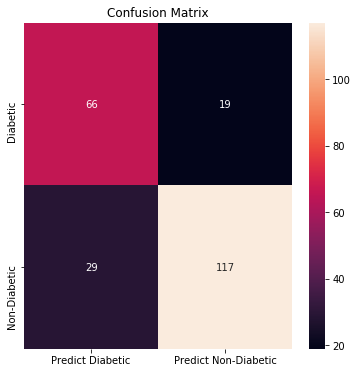

In [23]:
# Logistic Regression Model

Mdl_LogReg = LogisticRegression(solver="liblinear")

model_name = "LogisticRegression"
Param_grid_LogReg =  {'penalty': ['l1','l2'], 'C': np.linspace(0.1,1.1,10)}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl_LogReg,Param_grid_LogReg)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Training score is: 0.7189
Test Mean score is: 0.7576
Model Accuracy Score: 75.76%
Model Recall Score: 71.76%
Model Precision Score: 65.59%
Area under the ROC curve : 0.8558


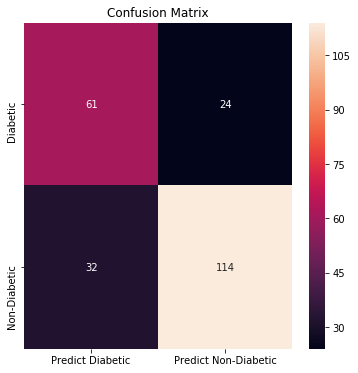

In [24]:
# Gaussian Naive Bayes Model

Mdl = GaussianNB()

model_name = "GaussianNB"

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid={})

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'metric': 'euclidean', 'n_neighbors': 3}
Training score is: 0.7577434607645875
Test Mean score is: 0.7359307359307359
Model Accuracy Score: 73.59%
Model Recall Score: 74.12%
Model Precision Score: 61.76%
Area under the ROC curve : 0.7884


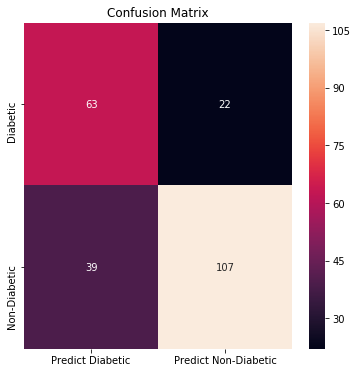

In [25]:
# K Neighbours Classifier Model

Mdl = KNeighborsClassifier()

model_name = "k-Nearest Neighbours"
Param_grid_kNeigh =  {'n_neighbors': list(np.arange(3,8)), 'metric': ['euclidean','manhattan','chebyshev','minkowski']}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_kNeigh)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'C': 0.9888888888888888, 'kernel': 'rbf'}
Training score is: 0.739758551307847
Test Mean score is: 0.8095238095238095
Model Accuracy Score: 80.95%
Model Recall Score: 77.65%
Model Precision Score: 72.53%
Area under the ROC curve : 0.8674


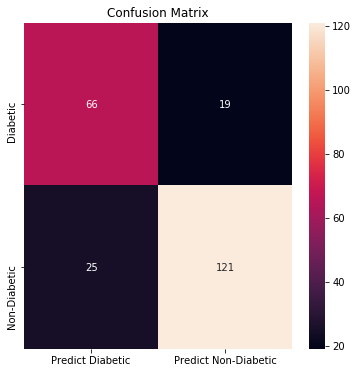

In [26]:
# Support Vector Machine Model

Mdl = SVC(probability=True)

model_name = "Support Vector Machine"
Param_grid_SVC =  {'C': np.linspace(0.1,1.1,10), 'kernel': ['linear','poly','rbf',]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_SVC)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.009}
Training score is: 0.7519604292421196
Test Mean score is: 0.7662337662337663
Model Accuracy Score: 76.62%
Model Recall Score: 83.53%
Model Precision Score: 63.96%
Area under the ROC curve : 0.8587


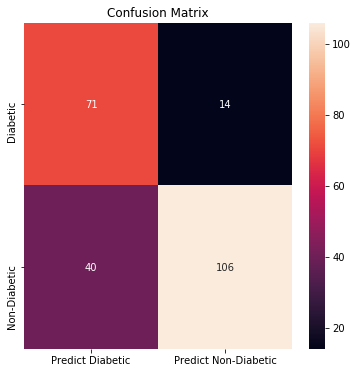

In [27]:
# Decision Tree Model

Mdl = DecisionTreeClassifier(random_state=1)

model_name = "DecisionTreeClassifier"
Param_grid_dt = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_dt)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0007}
Training score is: 0.7882669349429912
Test Mean score is: 0.8095238095238095
Model Accuracy Score: 80.95%
Model Recall Score: 83.53%
Model Precision Score: 70.30%
Area under the ROC curve : 0.879


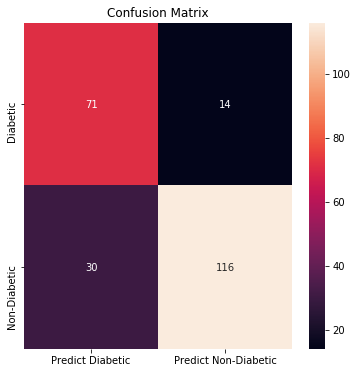

In [28]:
# Random Forest Model

Mdl = RandomForestClassifier(random_state=1,n_estimators=100)

model_name = "RandomForestClassifier"
Param_grid_rf = {'criterion':['gini','entropy'],'max_depth': [3, 4, 5, 6, 7, 8],
             'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_rf)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'max_samples': 1.0}
Training score is: 0.8106921529175051
Test Mean score is: 0.7792207792207793
Model Accuracy Score: 77.92%
Model Recall Score: 69.41%
Model Precision Score: 70.24%
Area under the ROC curve : 0.8671


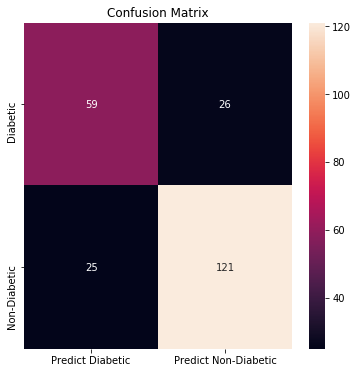

In [29]:
# Bagging Classifier

Mdl = BaggingClassifier(n_estimators=100, bootstrap=True)

model_name = "BaggingClassifier"
Param_grid_bc = {'max_samples': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_bc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'learning_rate': 0.30000000000000004}
Training score is: 0.7807183098591549
Test Mean score is: 0.7835497835497836
Model Accuracy Score: 78.35%
Model Recall Score: 82.35%
Model Precision Score: 66.67%
Area under the ROC curve : 0.8504


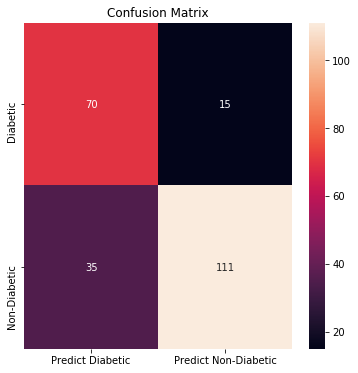

In [30]:
# AdaBoost Classifier

Mdl = AdaBoostClassifier( n_estimators= 100)

model_name = "AdaBoostClassifier"
Param_grid_abc = {'learning_rate': list(np.arange(0.1,1.1,0.1))}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_abc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

Best fit parameter is: {'max_depth': 6, 'min_impurity_decrease': 0.0003}
Training score is: 0.8218101945003353
Test Mean score is: 0.7922077922077922
Model Accuracy Score: 79.22%
Model Recall Score: 74.12%
Model Precision Score: 70.79%
Area under the ROC curve : 0.8552


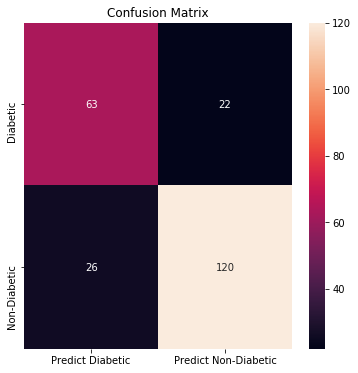

In [31]:
# GradientBoosting Classifier

Mdl = GradientBoostingClassifier(n_estimators= 100, learning_rate=0.1)

model_name = "GradientBoostingClassifier"
Param_grid_gbc = {'max_depth': [3, 4, 5, 6, 7, 8],'min_impurity_decrease': [0.0001, 0.0003, 0.0005, 0.0007, 0.009]}

Mdl_train_sc, Score_Accuracy, Score_Recall, Score_Precision, roc_auc = ML_test(Mdl,Param_grid_gbc)

summary = summary.append({'Model' : model_name, 'Training Accuracy' : Mdl_train_sc, 'Test Accuracy Score' : Score_Accuracy,\
                       'Test Recall Score' : Score_Recall, 'Test Precision Score' : Score_Precision, 'AUC': roc_auc}, \
                         ignore_index=True)

## Comparative Analysis

In [32]:
summary

,Model,Training Accuracy,Test Accuracy Score,Test Recall Score,Test Precision Score,AUC
0,LogisticRegression,72.53%,79.22%,77.65%,69.47%,0.8763
1,GaussianNB,71.89%,75.76%,71.76%,65.59%,0.8558
2,k-Nearest Neighbours,75.77%,73.59%,74.12%,61.76%,0.7884
3,Support Vector Machine,73.98%,80.95%,77.65%,72.53%,0.8674
4,DecisionTreeClassifier,75.20%,76.62%,83.53%,63.96%,0.8587
5,RandomForestClassifier,78.83%,80.95%,83.53%,70.30%,0.8790
6,BaggingClassifier,81.07%,77.92%,69.41%,70.24%,0.8671
7,AdaBoostClassifier,78.07%,78.35%,82.35%,66.67%,0.8504
8,GradientBoostingClassifier,82.18%,79.22%,74.12%,70.79%,0.8552


**Metrics**
<br>Accuracy: (TP+TN)/All
<br>Recall: TP/(TP+FN)
<br>Precision: TP/(TP+FP)
<br>Specificity: TN/(TN+FP)

Finally, we have trained our models, and above is a summarized table of the metrics of the various models, along with a handy definition of what the metrics represent. For this case, I did not include specificity and have included Area under Curve (AUC) as AUC is a good way of comparing which is the better model, with the higher the number, the better the model.
<br> Additionally, since the dataset is on Pima Indian Diabetes, there is a higher focus on the accuracy of predicting true positives (ie whether the patient has diabetes), hence true negatives are not really a priority. As such, greater focus will be placed on Accuracy and Recall.
<br> From the above, we can see that the test accuracy of the various models are generally within the same range, from approximately 73% to 81%. Based on Accuracy and Recall score, overally the RandomForestClassifier produced the best results, and it has a good AUC score as well.
<br> However, it is not confirmed that this model will be able to produce the same results when applied to other populations and datasets for checking on diabetes. Additionally, more research is required to see if it is possible to further improve the scores of the machine learning algorithm on this dataset.

## Conclusion

From the onset, there were 2 objectives:
<br>1) To attempt to see if it is possible to gleam any further information from the data to determine correlation between parameters and diabetes.
<br>2) To attempt to get the best accuracy score using various supervised learning machine learning algorithms.
<br> For the first objective, based on the hypothesis test, we can tell that glucose levels is positively correlated to a person having diabetes, but we are not able to confirm if there is causality.
<br> For the second objective, based on the comparison between the various algorithms used, Random Forest seems to produce the best results to me.